In [47]:
require(tidyverse)
require(extrafont)
require(wesanderson)
require(ggpubr)

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [65]:
read_delim('rescan.csv', delim = ';') -> df

Parsed with column specification:
cols(
  aaa_diameter = col_double(),
  growth = col_double(),
  growth_lower = col_double(),
  growth_upper = col_double(),
  sex = col_character(),
  rupture = col_double(),
  rupture_lower = col_double(),
  rupture_upper = col_double()
)


In [66]:
df$sex[df$sex == 'male'] <- 'Male'
df$sex[df$sex == 'female'] <- 'Female'

In [67]:
df  %>% head
    

aaa_diameter,growth,growth_lower,growth_upper,sex,rupture,rupture_lower,rupture_upper
3.0,1.28,1.03,1.53,Male,0.5,0.3,0.7
3.5,1.86,1.64,2.08,Male,0.9,0.6,1.3
4.0,2.44,2.22,2.65,Male,1.7,1.1,2.4
4.5,3.02,2.79,3.25,Male,3.2,2.2,4.6
5.0,3.61,3.34,3.88,Male,6.4,4.3,9.5
3.0,1.46,1.07,1.85,Female,2.2,1.3,4.0


In [89]:


df  %>% 
    select(aaa_diameter, contains('growth'), sex)  %>% 
    ggplot(aes(x = aaa_diameter, y = growth, col = sex)) +
    geom_ribbon(aes(x = aaa_diameter, ymin = growth_lower, ymax = growth_upper,
                    fill = sex, alpha = 0.5),   linetype = 2, alpha= 0.1) +
    geom_line(size = 1) +
    labs(y = 'Growth rate \n (mm/y)', x = 'AAA size', col = '') +
    scale_color_manual(values = wes_palette('Darjeeling1')) +
    theme_pubclean() + theme(text=element_text(family='Georgia')) +
    guides(fill = FALSE) -> p1

df  %>% 
    ggplot(aes(x = aaa_diameter, y = rupture, col = sex)) +
    geom_line(size = 1) +
    geom_ribbon(aes(x = aaa_diameter, ymin = rupture_lower, ymax = rupture_upper,
                fill = sex, alpha = 0.5),   linetype = 2, alpha= 0.1)  +
    labs(y = 'Rupture rate \n (/1000 person-years)', x = 'AAA size', x = '', col = '') +
    scale_color_manual(values = wes_palette('Darjeeling1')) +
    theme_pubclean() + theme(text=element_text(family='Georgia')) +
    guides(fill = FALSE) -> p2

In [91]:
options(repr.plot.width=5, repr.plot.height=3)

p <- ggarrange(p1,p2, common.legend = TRUE)

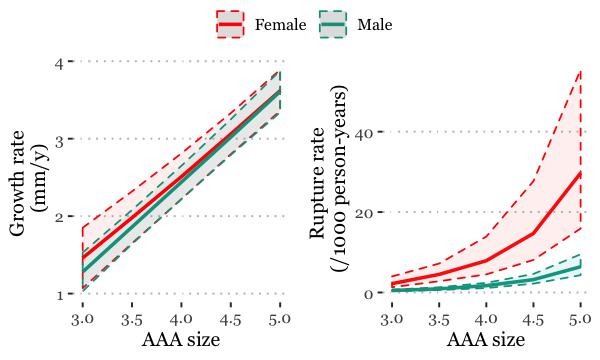

In [92]:
p

In [93]:
ggsave(filename = 'rescan.pdf', p, width = 5, height = 3)